## Predicting Customer Buying Behaviour

### Loading the data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'E:\Diego\Data_Analyst\Projects\British Airways\customer_booking.csv', encoding="ISO-8859-1")

In [3]:
pd.set_option('display.max.rows', 5000)

In [4]:
data.head(20)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


Since we need to predict whether a customer will make a booking, our target variable is 'booking complete', where a 0 indicates a 'no', and a 1 indicates a 'yes'.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df = data

In [7]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [8]:
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [9]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [10]:
df['flight_day'].value_counts()

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64

In [11]:
df['route'].value_counts()[:10]

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
Name: count, dtype: int64

In [12]:
df['booking_origin'].value_counts()[:10]

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
Name: count, dtype: int64

After reviewing all columns, the data is clean, and there are no missing values, so we can start handling the categorical data.

In [13]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [14]:
# For columns with only a few values we'll use hot encoding
df = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day'], drop_first=True)

We used one-hot encoding on flight_day because if we use label encoding, it will imply that Monday(0) is somehow less than Friday(4) which is just not true.

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
#columns to label encode
label_columns = ['route', 'booking_origin']
encoder = LabelEncoder()

for col in label_columns:
    df[col] = encoder.fit_transform(df[col])

In [19]:
df[['sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip', 'flight_day_Mon', 'flight_day_Tue', 'flight_day_Wed', 'flight_day_Thu', 'flight_day_Sat', 'flight_day_Sun']] = df[['sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip', 'flight_day_Mon', 'flight_day_Tue', 'flight_day_Wed', 'flight_day_Thu', 'flight_day_Sat', 'flight_day_Sun']].astype(int)

In [20]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed
0,2,262,19,7,0,61,1,0,0,5.52,0,0,0,1,0,1,0,0,0,0
1,1,112,20,3,0,61,0,0,0,5.52,0,0,0,1,0,1,0,0,0,0
2,2,243,22,17,0,36,1,1,0,5.52,0,0,0,1,0,0,0,0,0,1
3,1,96,31,4,0,61,0,0,1,5.52,0,0,0,1,0,1,0,0,0,0
4,2,68,22,15,0,36,1,0,1,5.52,0,0,0,1,0,0,0,0,0,1


Now that everything is numerical, we can move on.
Since we are going to use a tree-based model (random forest), scaling is not necessary.

### Splitting the data (80/20)

In [22]:
# defining x and y
x = df.drop(columns=['booking_complete']) #features
y = df['booking_complete'] #target variable

In [23]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Training set: (40000, 19) (40000,)
Test set: (10000, 19) (10000,)


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# training the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Now let's check the accuracy

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
y_pred = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8576


In [38]:
# check other metrics like precision, recall and F1 score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.61      0.11      0.18      1480

    accuracy                           0.86     10000
   macro avg       0.74      0.55      0.55     10000
weighted avg       0.83      0.86      0.81     10000



Accuracy of our model is 86%, but there's a catch!

If we look at the different metrics for each booking (0-> no booking, or 1 -> booking) we can see that:
* when the model aims to predict a no booking (0), its correct 86% of the time, with a 99% of recall, meaning the model almost never misses a no booking case.
* but when it aims to predict a booking (1), it's correct only 61% of the time, and has a recall of 11%, so it misses most of the actual bookings!

So overall, the 86% precision is not quite true, the only reason why it has a high accuracy is because most customers don't book, therefore the model mostly predicts no bookings, in order to get a high accuracy, and in our case, we are actually interested in predicting bookings, so let's tweak things.

In [40]:
#Adjust the model to give more importance to class 1
rf_balanced = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_balanced.fit(x_train, y_train)
y_pred = rf_balanced.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8557
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.58      0.09      0.15      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.54      0.54     10000
weighted avg       0.82      0.86      0.81     10000



Balancing out both classes didn't quite work, let's give a higher weight to class 1

In [41]:
# Assign higher weight to class 1
rf_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 1, 1: 5})
rf_weighted.fit(x_train, y_train)

# Predictions
y_pred = rf_weighted.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8556
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.58      0.09      0.16      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.54      0.54     10000
weighted avg       0.82      0.86      0.81     10000



It did't turn out either, so let's try another option: oversampling

In [45]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to generate synthetic data for class 1 so that both classes are equally common
smote = SMOTE(sampling_strategy=0.5, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Train the model again
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_smote.fit(x_train_resampled, y_train_resampled)
y_pred = rf_smote.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8334
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      8520
           1       0.38      0.20      0.26      1480

    accuracy                           0.83     10000
   macro avg       0.63      0.57      0.58     10000
weighted avg       0.80      0.83      0.81     10000



The model improved slightly but it's still low, let's see which features matter most

C:\Users\DIEGO\AppData\Local\Temp\ipykernel_12212\480256048.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


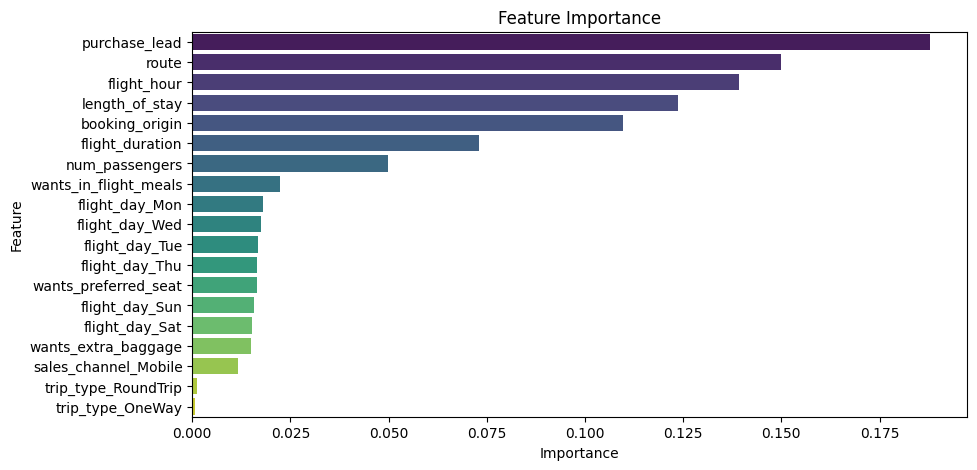

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()

In [48]:
# Dropping the least important features
cols_to_drop = ['trip_type_OneWay', 'trip_type_RoundTrip', 'sales_channel_Mobile', 'wants_extra_baggage', 'flight_day_Sat', 'flight_day_Sun', 'wants_preferred_seat']

x_train_reduced = x_train.drop(columns=cols_to_drop)
x_test_reduced = x_test.drop(columns=cols_to_drop)
rf_model.fit(x_train_reduced, y_train)
y_pred_reduced = rf_model.predict(x_test_reduced)
print(classification_report(y_test, y_pred_reduced))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.52      0.10      0.17      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.54      0.55     10000
weighted avg       0.81      0.85      0.81     10000



Let's switch to XGBoost instead of RandomForest which is better for imbalance datasets

In [51]:
from xgboost import XGBClassifier

In [52]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.48      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.67      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000



c:\Users\DIEGO\anaconda3\envs\DA_PythonEnvironment\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:49:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


85% accuracy but recall on bookings is still quite low (11%), and F1 score is 18%, so the model is not identifying the booking quite well yet.

In [54]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

param_dist = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
    'scale_pos_weight': [1, sum(y_train == 0) / sum(y_train == 1)]  # Adjust for class imbalance
}

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_clf, param_distributions=param_dist,
    n_iter=10, scoring='f1', cv=3, verbose=2, n_jobs=-1, random_state=42
)
random_search.fit(x_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
print("Best Parameters:", random_search.best_params_)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\DIEGO\anaconda3\envs\DA_PythonEnvironment\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:53:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.7, 'scale_pos_weight': 5.668889629876626, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 1}
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      8520
           1       0.32      0.68      0.44      1480

    accuracy                           0.74     10000
   macro avg       0.63      0.72      0.64     10000
weighted avg       0.84      0.74      0.77     10000



Recall improved a lot (68%), but it costed the precision to go down to 32% and accuracy to 74%. However in general, the F1 score went to 44% so its definitely a step in the right direction.

In [69]:
param_grid = {
    'n_estimators': [800],  # More boosting rounds
    'learning_rate': [0.01],  # Smaller learning rate for stability
    'max_depth': [8],  # Keeping as is
    'min_child_weight': [3],  # Prevent overfitting
    'subsample': [0.8],  
    'colsample_bytree': [0.8],  
    'scale_pos_weight': [3.5]  # Slightly reduced
}

xgb_tuned = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(xgb_tuned, param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate Model
y_pred = grid_search.best_estimator_.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 800, 'scale_pos_weight': 3.5, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      8520
           1       0.37      0.57      0.45      1480

    accuracy                           0.80     10000
   macro avg       0.65      0.70      0.66     10000
weighted avg       0.84      0.80      0.81     10000



On this new attempt our model has an accuracy of 80%, and the F1 score increased to 45%. There are some trade-offs here but I think this last model might be the best one so far.

### Let's see how well our model performed

#### Cross-validation

In [76]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_f1 = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='f1')
cv_accuracy = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation F1 Scores: {cv_f1}")
print(f"Mean F1 Score: {cv_f1.mean():.4f}")
print(f"Cross-Validation Accuracy Scores: {cv_accuracy}")
print(f"Mean Accuracy: {cv_accuracy.mean():.4f}")

Cross-Validation F1 Scores: [0.40824468 0.43713995 0.41756032 0.40964674 0.46148556]
Mean F1 Score: 0.4268
Cross-Validation Accuracy Scores: [0.7775   0.792375 0.78275  0.78275  0.80425 ]
Mean Accuracy: 0.7879


#### Feature Importance Validation

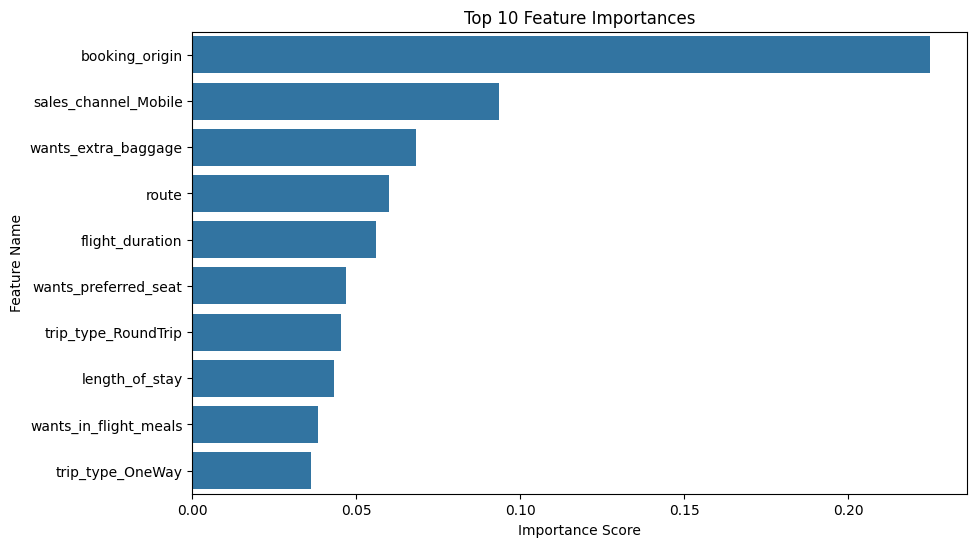

In [81]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_names = x_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df[:10])  # Top 10 features
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight') 
plt.show()